In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv("seattleWeather_1948-2017.csv",encoding = "ISO-8859-1")
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [4]:
df['RAIN'].value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

In [5]:
df['RAIN']=df["RAIN"].map(lambda i: 1 if i==True else 0)
df['RAIN'].value_counts()

0    14651
1    10900
Name: RAIN, dtype: int64

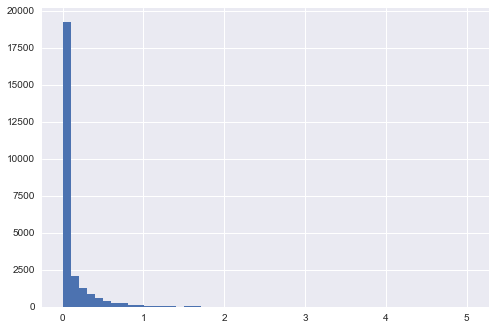

In [6]:
df['PRCP'].hist(bins=50)

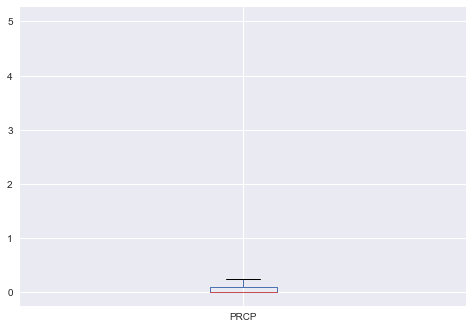

In [7]:
df.boxplot(column="PRCP")

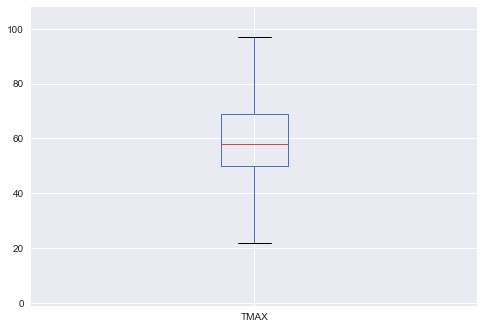

In [8]:
df.boxplot(column="TMAX")

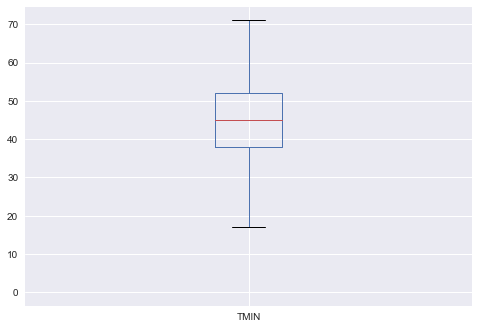

In [9]:
df.boxplot(column="TMIN")

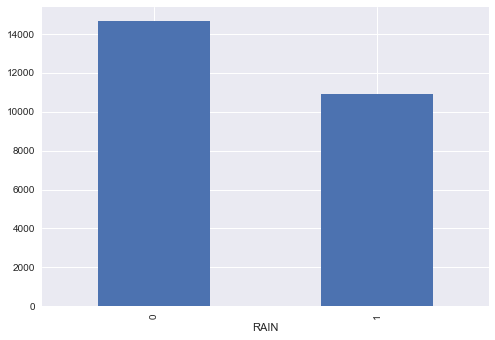

In [22]:
df.RAIN.groupby(df.RAIN).count().plot(kind="bar")

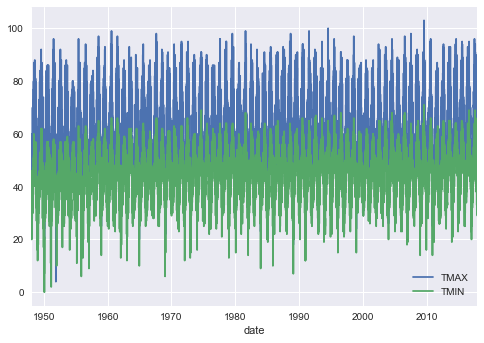

In [23]:
df['date'] = pd.to_datetime(df['DATE'])
ax=df.plot(x='date', y=["TMAX","TMIN"])

In [10]:
def num_missing(x):
  return sum(x.isnull())

In [11]:
print(df.apply(num_missing, axis=0))

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    0
dtype: int64


In [12]:
df['PRCP'].fillna(df['PRCP'].mean(), inplace=True)

In [13]:
print(df.apply(num_missing,axis=0))

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64


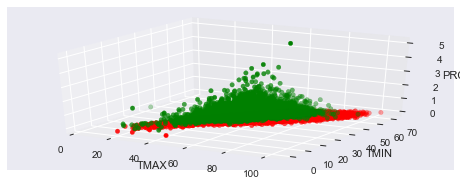

In [14]:
#Lets take help of 3d plot to visulize wheather conditon
df_plot=df[['PRCP','TMAX','TMIN','RAIN']]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('TMAX')
ax.set_ylabel('TMIN')
ax.set_zlabel('PRCP')
ax.scatter(df_plot[df_plot.RAIN==0]['TMAX'],
              df_plot[df_plot.RAIN == 0]['TMIN'],
              df_plot[df_plot.RAIN == 0]['PRCP'],marker="o",color="Red")
ax.scatter(df_plot[df_plot.RAIN==1]['TMAX'],
              df_plot[df_plot.RAIN == 1]['TMIN'],
              df_plot[df_plot.RAIN == 1]['PRCP'],marker="o",color="green")

# Lets check the correlation between the variables.

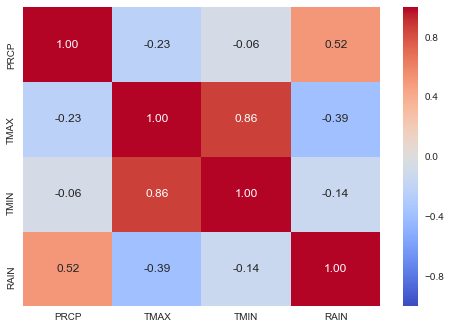

In [15]:
g = sns.heatmap(df_plot[["PRCP","TMAX","TMIN","RAIN"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Only PRCP(precipitation in inches) has a significative correlation with the Rain variable.

# Feature Imporatnce: To predict rain

In [16]:
df.iloc[:,1:4].columns

Index(['PRCP', 'TMAX', 'TMIN'], dtype='object')

In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

PRCP = 0.88060121777
TMAX = 0.091197695698
TMIN = 0.0282010865318


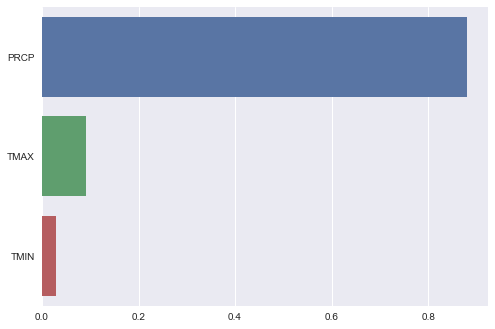

In [18]:
df=df.dropna()
rnd_clf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rnd_clf.fit(df.iloc[:,1:4],df.iloc[:,4])
for name,importance in zip(df.iloc[:,1:4].columns,rnd_clf.feature_importances_):
    print(name, "=", importance)
g = sns.barplot(y=df.iloc[:,1:4].columns,x = rnd_clf.feature_importances_, orient='h')

# Feature Importance: To predict Max Temprature

PRCP = 0.051633905901
TMIN = 0.872068996139
RAIN = 0.0762970979596


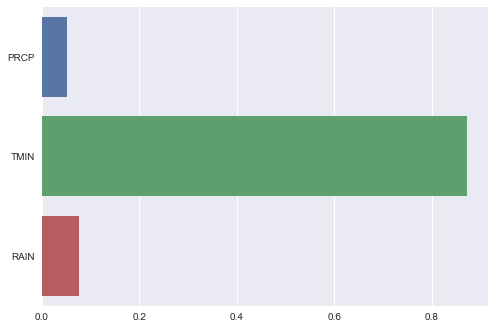

In [19]:
rnd_reg=RandomForestRegressor(n_estimators=100,random_state=0)
rnd_reg.fit(df.iloc[:,[1,3,4]],df.iloc[:,2])
for name, importance in zip(df.iloc[:,[1,3,4]].columns, rnd_reg.feature_importances_):
    print(name, "=", importance)

g = sns.barplot(y=df.iloc[:,[1,3,4]].columns,x = rnd_reg.feature_importances_, orient='h')

# Feature Importance: To predict Min Temperature

PRCP = 0.047097943381
TMAX = 0.934762078648
RAIN = 0.0181399779714


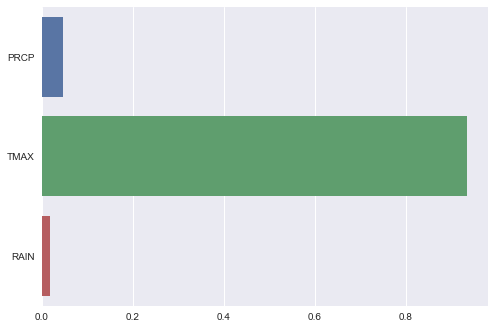

In [20]:
rnd_reg = RandomForestRegressor(n_estimators = 100 ,random_state = 0)
rnd_reg.fit(df.iloc[:,[1,2,4]],df.iloc[:,3])
for name, importance in zip(df.iloc[:,[1,2,4]].columns, rnd_reg.feature_importances_):
    print(name, "=", importance)

g = sns.barplot(y=df.iloc[:,[1,2,4]].columns,x = rnd_reg.feature_importances_, orient='h')

# Feature Importance : To Predict Precipitation in inches

TMAX = 0.168706245079
TMIN = 0.1528879869
RAIN = 0.678405768022


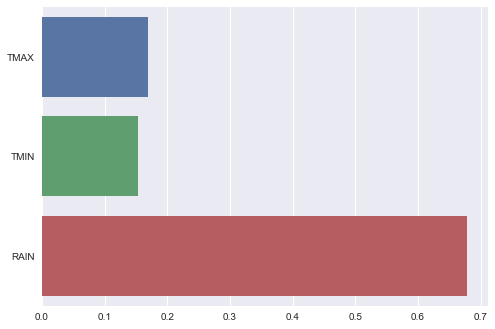

In [21]:
rnd_reg = RandomForestRegressor(n_estimators = 100 ,random_state = 0)
rnd_reg.fit(df.iloc[:,[2,3,4]],df.iloc[:,1])
for name, importance in zip(df.iloc[:,[2,3,4]].columns, rnd_reg.feature_importances_):
    print(name, "=", importance)

g = sns.barplot(y=df.iloc[:,[2,3,4]].columns,x = rnd_reg.feature_importances_, orient='h')


In [24]:
model=LogisticRegression()

In [27]:
X=df.iloc[:,1:4]
y=df.iloc[:,4]
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
pred=model.predict(X)
print(pred)

[1 1 1 ..., 0 0 0]


In [36]:
#Accuracy
from sklearn import metrics

In [43]:
def classification_model(model,data,predictors,outcome):
    #fit the model
    model.fit(df[predictors],df[outcome])
    predictions=model.predict(df[predictors])
    accuracy=metrics.accuracy_score(predictions,df[outcome])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

In [44]:
outcome_var = 'RAIN'
model = LogisticRegression()
predictor_var = ['TMAX']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 66.322%


In [45]:
outcome_var = 'RAIN'
model = LogisticRegression()
predictor_var = ['TMIN']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 53.677%


In [46]:
outcome_var = 'RAIN'
model = LogisticRegression()
predictor_var = ['PRCP']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 91.640%


In [52]:
predictor_var = ['PRCP','TMAX','TMIN']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 93.296%


In [61]:
X = df.iloc[:, [1, 2,3]].values
y=df.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [65]:
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [66]:
y_pred=classifier.predict(X_test)

In [68]:
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [69]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3692,    0],
       [   0, 2696]], dtype=int64)

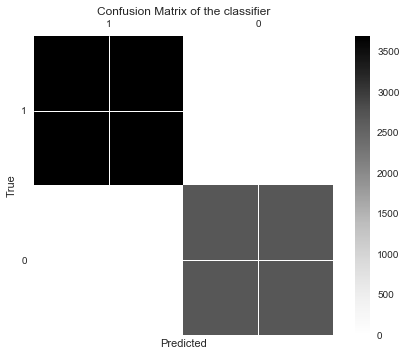

In [70]:
labels=[1,0]
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(cm)
plt.title("Confusion Matrix of the classifier")
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
#Decision tree
model = DecisionTreeClassifier()
predictor_var = ['PRCP','TMIN','TMAX']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%


In [73]:
model = LogisticRegression()
predictor_var = ['PRCP','TMIN','TMAX']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 93.296%


In [75]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['PRCP','TMIN','TMAX']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
